In [ ]:
!pip install --upgrade nibabel

Get data


In [16]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

--2021-02-15 16:54:56--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPTg2ak5iTkxSMkVn [following]
--2021-02-15 16:54:57--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnR

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Create valid dirs

In [ ]:
!mkdir /content/FirstDataset/valid
!mkdir /content/SecondDataset/valid

In [ ]:
!mkdir /content/FirstDataset/train2

Checking the number of scans in dirs 

In [ ]:
import os
import shutil

print("FirstDataset")
filepath1 = '/content/FirstDataset/train'
filenames1 = os.listdir(filepath1)
filenames1 = sorted(filenames1)
print('train', len(filenames1))
print('test', len(os.listdir('/content/FirstDataset/test')))
print(int(len(filenames1)/5)) #114

print("SecondDataset")
filepath2 = '/content/SecondDataset/train'
filenames2 = os.listdir(filepath2)
filenames2 = sorted(filenames2)
print('train', len(filenames2))
print('test', len(os.listdir('/content/SecondDataset/test')))
print(int(len(filenames2)/5)) # 20

FirstDataset
train 574
test 72
114
SecondDataset
train 100
test 25
20


In [ ]:
import os
import shutil
from pathlib import Path

# FirstDataset
filepath1 = Path('/content/FirstDataset/train')

train_X_1 = []
train_y_1 = []

for scan_path in sorted(filepath1.iterdir()):
  if scan_path.name.endswith('mask.nii.gz'):
    train_y_1.append(scan_path)
  else:
    train_X_1.append(scan_path)

print(len(train_X_1), train_X_1)
print(len(train_y_1), train_y_1)

# SecondDataset
filepath2 = Path('/content/SecondDataset/train')

train_X_2 = []
train_y_2 = []

for scan_path in sorted(filepath2.iterdir()):
    train_y_2.append(scan_path/'mask.nii.gz')
    train_X_2.append(scan_path/'T1w.nii.gz')

print(len(train_X_2), train_X_2)
print(len(train_y_2), train_y_2)



287 [PosixPath('/content/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba.nii.gz'), PosixPath('/content/FirstDataset/train/0187e4cb2fb4971848c8981e9ece0849.nii.gz'), PosixPath('/content/FirstDataset/train/022161680299e1f3bea7169947dc45b6.nii.gz'), PosixPath('/content/FirstDataset/train/02862555e24fd75a84a3259e4210e73b.nii.gz'), PosixPath('/content/FirstDataset/train/04e0e6ed0432fd737fd3f29fe551b77c.nii.gz'), PosixPath('/content/FirstDataset/train/05b438c4933b77168c529ea19486a1c9.nii.gz'), PosixPath('/content/FirstDataset/train/06503d8025b2830c50599cfcc0febd39.nii.gz'), PosixPath('/content/FirstDataset/train/0a2de3cae8ca66ea62b7e2dae3bdffca.nii.gz'), PosixPath('/content/FirstDataset/train/0b3ea09bb26b17af2b596e96875d2ca2.nii.gz'), PosixPath('/content/FirstDataset/train/0c7dc995949da4278941d36c048ff2c9.nii.gz'), PosixPath('/content/FirstDataset/train/0efee62646deb97c8c7cfa0f457fa4dc.nii.gz'), PosixPath('/content/FirstDataset/train/105625ce5c645192e3c3ca78b7b32edb.nii.gz'), PosixPath('

In [ ]:
from sklearn.model_selection import train_test_split

X_train_all = train_X_1 + train_X_2
y_train_all = train_y_1 + train_y_2

X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, train_size=0.9, random_state=42)

print('X_train len:', len(X_train))
print('y_train len:', len(y_train))
print('X_valid len:', len(X_valid))
print('y_valid len:', len(y_valid))


X_train len: 348
y_train len: 348
X_valid len: 39
y_valid len: 39


###Eksport to png

Template methods

In [14]:
import numpy as np
import nibabel as nib

from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

Create dirs for images

In [ ]:
!rm -rf /content/Images

!mkdir /content/Images

!mkdir /content/Images/valid
!mkdir /content/Images/valid/images
!mkdir /content/Images/valid/images/images
!mkdir /content/Images/valid/masks
!mkdir /content/Images/valid/masks/masks

!mkdir /content/Images/train
!mkdir /content/Images/train/images
!mkdir /content/Images/train/images/images
!mkdir /content/Images/train/masks
!mkdir /content/Images/train/masks/masks

print("done")

done


In [ ]:
!ls /content/Images/valid/images/images

Export to png

In [ ]:
# print(X_train)
# print(len(X_train))

# X_train = X_train[0:10]
# y_train = y_train[0:10]
# X_valid = X_valid[0:10]
# y_valid = y_valid[0:10]

# print(X_train)
# print(len(X_train))
# print(y_train)
# print(len(y_train))

[PosixPath('/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012289.nii.gz'), PosixPath('/content/FirstDataset/train/3600b0c2de04973782eee6256d453fb3.nii.gz'), PosixPath('/content/SecondDataset/train/f8a6e51b9d4b8c0d1db579aec43f4d56/T1w.nii.gz'), PosixPath('/content/SecondDataset/train/29e9cc5252f20fccdc31f5b2498c2cea/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/68b91fb712cd2c2a577a39966b9938b6.nii.gz'), PosixPath('/content/FirstDataset/train/64fc34796f18199faaf9cc60998c5bbb.nii.gz'), PosixPath('/content/SecondDataset/train/bce32491497655423e5af47a62bdcf95/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/3a14401f2de9c2eb4fe22f2228f81309.nii.gz'), PosixPath('/content/FirstDataset/train/1cdd4ddcbd83403d890b14cb499776e5.nii.gz')]
10
[PosixPath('/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_train_path = '/content/Images/train/images/images/'
mask_train_path = '/content/Images/train/masks/masks/'

image_valid_path = '/content/Images/valid/images/images/'
mask_valid_path = '/content/Images/valid/masks/masks/'


print('X_train start')
for scan_idx, scan_path in enumerate(X_train):
  print(scan_path)
  if scan_path.name.endswith('mask.nii.gz'):
    pass
  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for slice_idx in range(raw_volume.shape[0]):
      path = f'{image_train_path}train_image_{scan_idx}_slice_{slice_idx}_.png'
      # print(path)

      volume = (raw_volume[slice_idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')
      matplotlib.image.imsave(path, volume, vmin=0,vmax=255)
print("X_train finish")

print('y_train start')
for scan_idx, scan_path in enumerate(y_train):
  print(scan_path)

  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)
    for slice_idx in range(mask_volume.shape[0]):

      path = f'{mask_train_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'
      matplotlib.image.imsave(path, mask_volume[slice_idx],cmap="gray")

  else:
    pass
print("y_train finish")

print('X_valid start')
for scan_idx, scan_path in enumerate(X_valid):
  print(scan_path)
  if scan_path.name.endswith('mask.nii.gz'):
    pass
  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for slice_idx in range(raw_volume.shape[0]):
      path = f'{image_valid_path}valid_image_{scan_idx}_slice_{slice_idx}_.png'
      # print(path)

      volume = (raw_volume[slice_idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')
      matplotlib.image.imsave(path, volume, vmin=0,vmax=255)
print("X_valid finish")

print('y_valid start')
for scan_idx, scan_path in enumerate(y_valid):
  print(scan_path)

  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)
    for slice_idx in range(mask_volume.shape[0]):

      path = f'{mask_valid_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'
      matplotlib.image.imsave(path, mask_volume[slice_idx],cmap="gray")

  else:
    pass
print("y_valid finish")



In [ ]:
!ls /content/Images/train/images/images/


In [ ]:
import os
import shutil
from pathlib import Path

!zip -r data_images.zip /content/Images
src  = '/content/data_images.zip'
dst = '/content/drive/MyDrive/ZPO_projekt'

shutil.move(src,dst)

'/content/drive/MyDrive/ZPO_projekt/data_images.zip'

In [ ]:
!unzip '/content/drive/MyDrive/ZPO_projekt/data_images.zip'

In [ ]:
!ls /content/content/Images/train/images/images

In [41]:
import tensorflow as tf
from segmentation_models import get_preprocessing

preprocesing_function = get_preprocessing('efficientnetb1')

augmentations=dict(
        # horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=5
)

train_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    # **augmentations
    # preprocessing_function=preprocesing_function,
    )

train_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    # **augmentations
    # preprocessing_function=preprocesing_function,
 )

In [42]:
import tensorflow as tf
# from segmentation_models import get_preprocessing


batch_size = 128
# preprocesing_function = get_preprocessing('efficientnetb0')


train_images_generator = train_images_datagen.flow_from_directory(
    '/content/content/Images/train/images',
    target_size=(128, 128),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    color_mode='grayscale',
    class_mode=None,
    # subset = 'training'
    )



train_mask_generator = train_mask_datagen.flow_from_directory(
    '/content/content/Images/train/masks',
     target_size=(128, 128),
     batch_size=batch_size,
     seed=42,
     class_mode=None,
     color_mode='grayscale',
     interpolation='nearest',
    #  subset = 'training'
    )


train_combined_generator = zip(train_images_generator, train_mask_generator)





Found 69398 images belonging to 1 classes.
Found 69398 images belonging to 1 classes.


In [50]:

valid_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # preprocessing_function=preprocesing_function,
    rescale = 1/255,
    )

valid_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # preprocessing_function=preprocesing_function,
    rescale = 1/255,
 )

In [51]:

val_images_generator = valid_images_datagen.flow_from_directory(
    '/content/content/Images/valid/images',
    target_size=(64, 64),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    color_mode='grayscale',
    class_mode=None
    # subset = 'validation'
    )



val_mask_generator = valid_mask_datagen.flow_from_directory(
    '/content/content/Images/valid/masks',
     target_size=(64, 64),
     batch_size=batch_size,
     interpolation ='nearest',
     color_mode='grayscale',
     seed=42,
     class_mode=None
    #  subset = 'validation'
    )
val_combined_generator = zip(val_images_generator, val_mask_generator)

Found 7817 images belonging to 1 classes.
Found 7817 images belonging to 1 classes.


In [33]:
joined_generator = zip(train_images_generator, train_mask_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images,masks = next(joined_generator)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(images[0].astype(int))
fig.add_subplot(1, 2, 2)
plt.imshow(masks[0].astype(int))

In [ ]:
# segmentation_models nie jest domyślnie zainstalowane w Colabie
!pip install segmentation_models

In [ ]:
%env SM_FRAMEWORK=tf.keras

In [39]:
def dice_coef(y_true, y_pred, smooth=0.001):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """


    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    # print((2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth))
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

 
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [52]:
import segmentation_models
import keras
from segmentation_models import Unet
from segmentation_models.losses import DiceLoss

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
# import segmentation_models. as smp

model_base = Unet('efficientnetb1', classes=1, activation='sigmoid', encoder_weights='imagenet', encoder_freeze=False)


inp = Input(shape=(None, None, 1))


l1 = tf.keras.layers.Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = model_base(l1)
model = Model(inp, out, name="model")

optimizer = tf.keras.optimizers.Adam(lr=2e-4)
loss =  DiceLoss()
model.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=[dice_coef,keras.metrics.BinaryAccuracy(),
                            segmentation_models.metrics.IOUScore(threshold=0.5),
                            segmentation_models.metrics.FScore(threshold=0.5)])


In [ ]:
model.summary()

In [53]:
from keras.callbacks import ModelCheckpoint


training_samples = train_images_generator.n
validation_samples = val_images_generator.n


batch_size = 128


model.fit(
    train_combined_generator, 
    steps_per_epoch=training_samples // batch_size,
    validation_data = val_combined_generator,
    validation_steps = validation_samples // batch_size,
    epochs=2,
    workers=2,
    use_multiprocessing=True,
    verbose=1,
)
model.save('/content/drive/MyDrive/ZPO_projekt/model4.hdf5')

Epoch 1/2
542/542 [==============================] - 474s 851ms/step - loss: 0.5159 - dice_coef: 0.6791 - binary_accuracy: 0.8525 - iou_score: 0.6253 - f1-score: 0.7168 - val_loss: 0.1952 - val_dice_coef: 0.8799 - val_binary_accuracy: 0.9744 - val_iou_score: 0.7577 - val_f1-score: 0.8620
Epoch 2/2
542/542 [==============================] - 459s 847ms/step - loss: 0.0398 - dice_coef: 0.9859 - binary_accuracy: 0.9964 - iou_score: 0.9658 - f1-score: 0.9826 - val_loss: 0.1361 - val_dice_coef: 0.8807 - val_binary_accuracy: 0.9757 - val_iou_score: 0.7691 - val_f1-score: 0.8694


In [12]:
# model.save('/content/drive/MyDrive/ZPO_projekt/model2.hdf5')

In [55]:
!rm -r /content/Predictions/

In [56]:
from pathlib import Path

predictions_base_path = Path('/content/Predictions')
first_dataset_predictions_path = predictions_base_path / 'first'
second_dataset_predictions_path = predictions_base_path / 'second'

first_dataset_predictions_path.mkdir(exist_ok=True, parents=True)
second_dataset_predictions_path.mkdir(exist_ok=True, parents=True)

In [18]:
model.load_weights(f"/content/drive/MyDrive/ZPO_projekt/model3.hdf5")

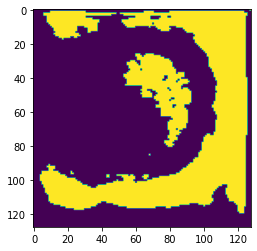

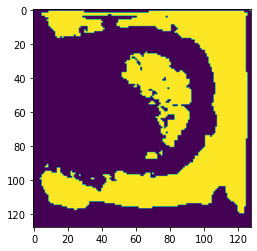

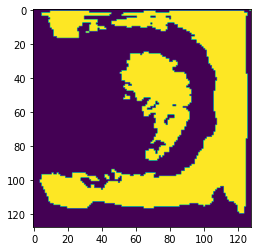

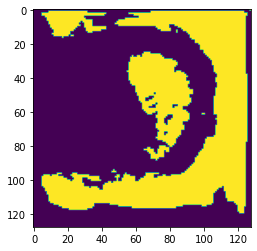

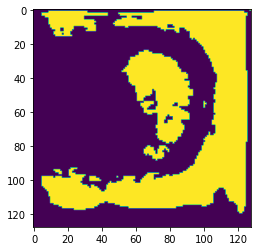

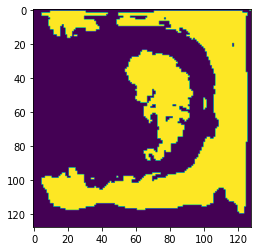

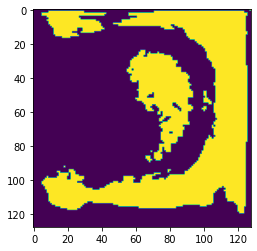

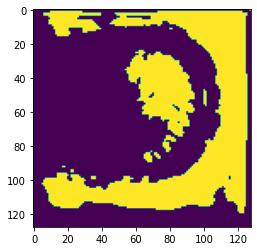

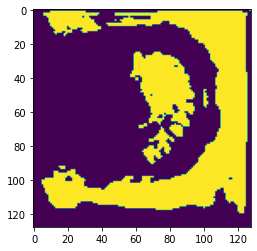

KeyboardInterrupt: ignored

In [61]:
import cv2
import matplotlib.pyplot as plt


first_dataset_test_path = Path('/content/FirstDataset/test')
second_dataset_test_path = Path('/content/SecondDataset/test')

licznik = 1
for scan_path in first_dataset_test_path.iterdir():
  print(licznik)
  licznik += 1

  data, affine = load_raw_volume(scan_path)
  labels = np.zeros(data.shape, dtype=np.uint8)

  data_max=np.amax(data)
  data_min=np.amin(data)

  x_size, y_size, z_size = data.shape
  for x_index in range(x_size):
    data_slice = data[x_index]
    # normalizacja
    data_slice = (data_slice - data_min)/(data_max - data_min)
    # zmiana wymiaru do wymiaru na którym była uczona sieć
    data_slice = cv2.resize(data_slice, (128, 128))
    data_slice = data_slice[...,np.newaxis]
    data_slice = data_slice[np.newaxis,...]

    prediction = model.predict(data_slice)
    prediction = prediction.squeeze()
    # plt.imshow(prediction)
    # plt.show()
    # binaryzacja ( zostają wartości 0 oraz 1)
    prediction[prediction<0.05]=0
    prediction[prediction>=0.05]=1
    plt.imshow(prediction)
    plt.show()
    prediction = cv2.resize(prediction,(z_size,y_size))

    labels[x_index] = prediction

  save_labels(labels, affine, first_dataset_predictions_path / scan_path.name)

#----------------------------------------------
licznik = 1 
for scan_path in second_dataset_test_path.iterdir():
  print(licznik)
  licznik += 1

  data, affine = load_raw_volume(scan_path / 'T1w.nii.gz')
  labels = np.zeros(data.shape, dtype=np.uint8)


  x_size, y_size, z_size = data.shape
  for x_index in range(x_size):
    data_slice = data[x_index]
    # normalizacja
    data_slice = (data_slice - data_min)/(data_max - data_min)
    # zmiana wymiaru do wymiaru na którym była uczona sieć
    data_slice = cv2.resize(data_slice, (128, 128))
    data_slice = data_slice[...,np.newaxis]
    data_slice = data_slice[np.newaxis,...]
    prediction = model.predict(data_slice)
    prediction = prediction.squeeze()
    # plt.imshow(prediction)
    # plt.show()
    # binaryzacja ( zostają wartości 0 oraz 1)
    prediction[prediction<0.05]=0
    prediction[prediction>=0.05]=1
    # plt.imshow(prediction)
    # plt.show()
    prediction = cv2.resize(prediction,(z_size,y_size))

    labels[x_index] = prediction
  
  save_labels(labels, affine, second_dataset_predictions_path / f'{scan_path.name}.nii.gz')

In [42]:
import os
import shutil
from pathlib import Path

# !zip -r predictions_1.zip /content/Predictions/
src  = '/content/predictions_1.zip'
dst = '/content/drive/MyDrive/ZPO/predictions'

shutil.move(src,dst)

'/content/drive/MyDrive/ZPO/predictions'

In [52]:
import requests
import zlib

score = []
for dataset_predictions_path in (first_dataset_predictions_path, second_dataset_predictions_path):
  for prediction_path in dataset_predictions_path.iterdir():
    prediction_name = prediction_path.name[:-7]  # Usuwanie '.nii.gz' z nazwy pliku
    prediction = nib.load(str(prediction_path))

    response = requests.post(f'https://zpo.dpieczynski.pl/{prediction_name}', data=zlib.compress(prediction.to_bytes()))
    if response.status_code == 200:
        print(dataset_predictions_path.name, prediction_path.name, response.json())
        score.append(response.json()['dice'])
    else:
        print(f'Error processing prediction {dataset_predictions_path.name}/{prediction_name}: {response.text}')
print("mean score:", np.mean(score))

first 2c10e47f4b17b611666ca076d7b04024.nii.gz {'dice': 0.5651064067128568, 'auc': 0.7793380839890628}
first 91011ce77f5c743e1fbbc47564403a87.nii.gz {'dice': 0.5425970680391599, 'auc': 0.7173354193706281}
first 5b3cb52ff434faef2e26494927393d66.nii.gz {'dice': 0.2570507569516084, 'auc': 0.5766761431426543}
first 9fd8ecf23ffc7da1c0708ea1428eba96.nii.gz {'dice': 0.5662550713382833, 'auc': 0.7160616495524499}
first d0858c4acdecad0b89bae8e1c55ee92c.nii.gz {'dice': 0.6075738645094209, 'auc': 0.7554915973083254}
first 94596ee05f924881b9b11ded19933ca1.nii.gz {'dice': 0.5506155571865783, 'auc': 0.73513394938193}
first 64051b3483da339bf5792b5820faf6ae.nii.gz {'dice': 0.5079928921525464, 'auc': 0.7132575150658024}
first 82922aea8b29f4daae228061912634f4.nii.gz {'dice': 0.5069137714068316, 'auc': 0.6846410237356976}
first d5394a622174b44af897d5e9d60c4739.nii.gz {'dice': 0.23217857815466525, 'auc': 0.5675075463566654}
first 11a79c48577d879e9d52a874df3c0184.nii.gz {'dice': 0.2668919658477681, 'auc': 0

KeyboardInterrupt: ignored